# Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload and Read the Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocesssing

**Checking for the missing values**

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Checking for the data types

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Checking for Duplicate Entries

In [ ]:
df.duplicated().sum()

0

Converting "TotalCharges" Column to Numeric

In [ ]:
# converting the type of "TotalCharges" column from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = 0
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Converting "Yes/No" Columns to Binary (0/1)

In [ ]:
# Convert 'Yes/No' Columns to 0/1
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

Fixing "No Internet Service" Entries

In [ ]:
# Fix Columns with 'No internet service'
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_fix:
   df[col] = df[col].astype(str).replace({'No internet service': '0', 'Yes': '1', 'No': '0'}).astype(int)

One-Hot Encoding for Categorical Columns

In [ ]:
# One-Hot Encoding for Categorical Columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

Dropping the "customerID" Column

In [ ]:
# Drop 'customerID' Column (Not Useful for Modeling)
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

Checking Final Data Types

In [ ]:
# Check Final Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   object 
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

Checking for Missing Values Again

In [ ]:
# Check for Null Values Again
print(df.isnull().sum())

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

Feature Scaling Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

Splitting Features and Target Variable

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Visualizing Churn Distribution

<ipython-input-15-32745247de35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['blue', 'red'])


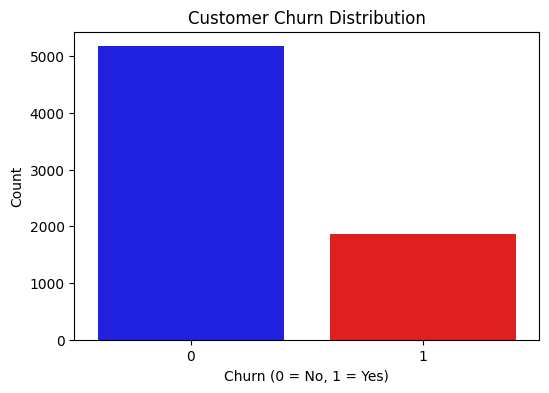

       SeniorCitizen      Partner   Dependents        tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7.043000e+03   7043.000000   
mean        0.162147     0.483033     0.299588 -2.421273e-17      0.903166   
std         0.368612     0.499748     0.458110  1.000071e+00      0.295752   
min         0.000000     0.000000     0.000000 -1.318165e+00      0.000000   
25%         0.000000     0.000000     0.000000 -9.516817e-01      1.000000   
50%         0.000000     0.000000     0.000000 -1.372744e-01      1.000000   
75%         0.000000     1.000000     1.000000  9.214551e-01      1.000000   
max         1.000000     1.000000     1.000000  1.613701e+00      1.000000   

       OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7043.000000   7043.000000       7043.000000  7043.000000   
mean         0.286668      0.344881          0.343888     0.290217   
std          0.452237      0.475363          0.475038     0.453895   
min          0.00

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette=['blue', 'red'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(df.describe())


Visualizing Churn by Different Factors

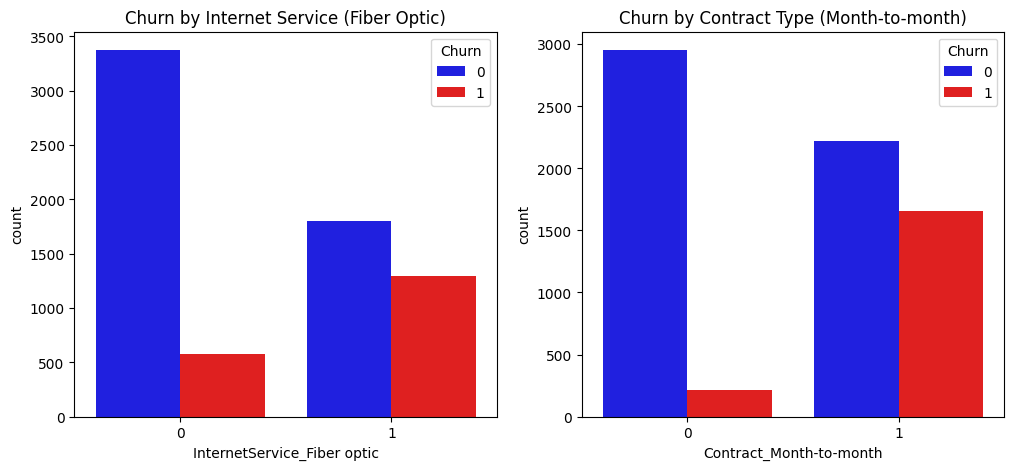

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df, ax=axes[0], palette=['blue', 'red'])
axes[0].set_title("Churn by Internet Service (Fiber Optic)")

sns.countplot(x='Contract_Month-to-month', hue='Churn', data=df, ax=axes[1], palette=['blue', 'red'])
axes[1].set_title("Churn by Contract Type (Month-to-month)")

plt.show()


Monthly Charges vs Churn (Boxplot)

<ipython-input-17-33129206c879>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['blue', 'red'])


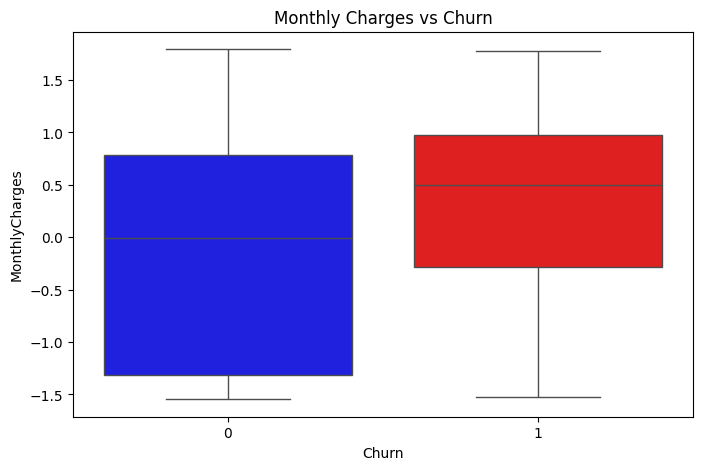

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['blue', 'red'])
plt.title("Monthly Charges vs Churn")
plt.show()


Distribution of Tenure by Churn

<ipython-input-18-33d23b76711d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 0]['tenure'], label="Not Churned", shade=True, color="blue")
<ipython-input-18-33d23b76711d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 1]['tenure'], label="Churned", shade=True, color="red")


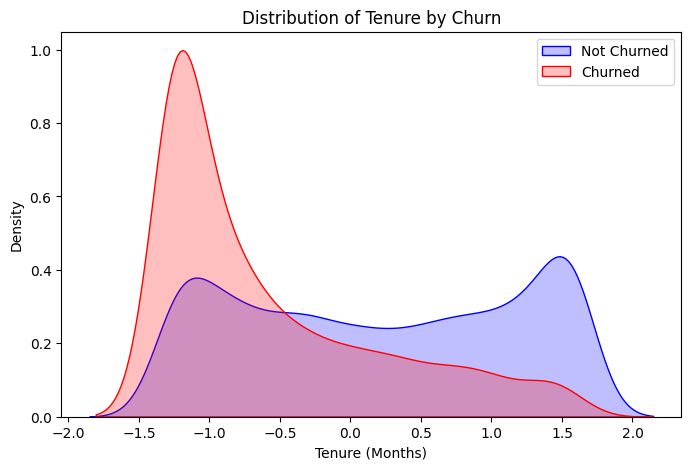

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn'] == 0]['tenure'], label="Not Churned", shade=True, color="blue")
sns.kdeplot(df[df['Churn'] == 1]['tenure'], label="Churned", shade=True, color="red")
plt.title("Distribution of Tenure by Churn")
plt.xlabel("Tenure (Months)")
plt.legend()
plt.show()


Feature Correlation Heatmap

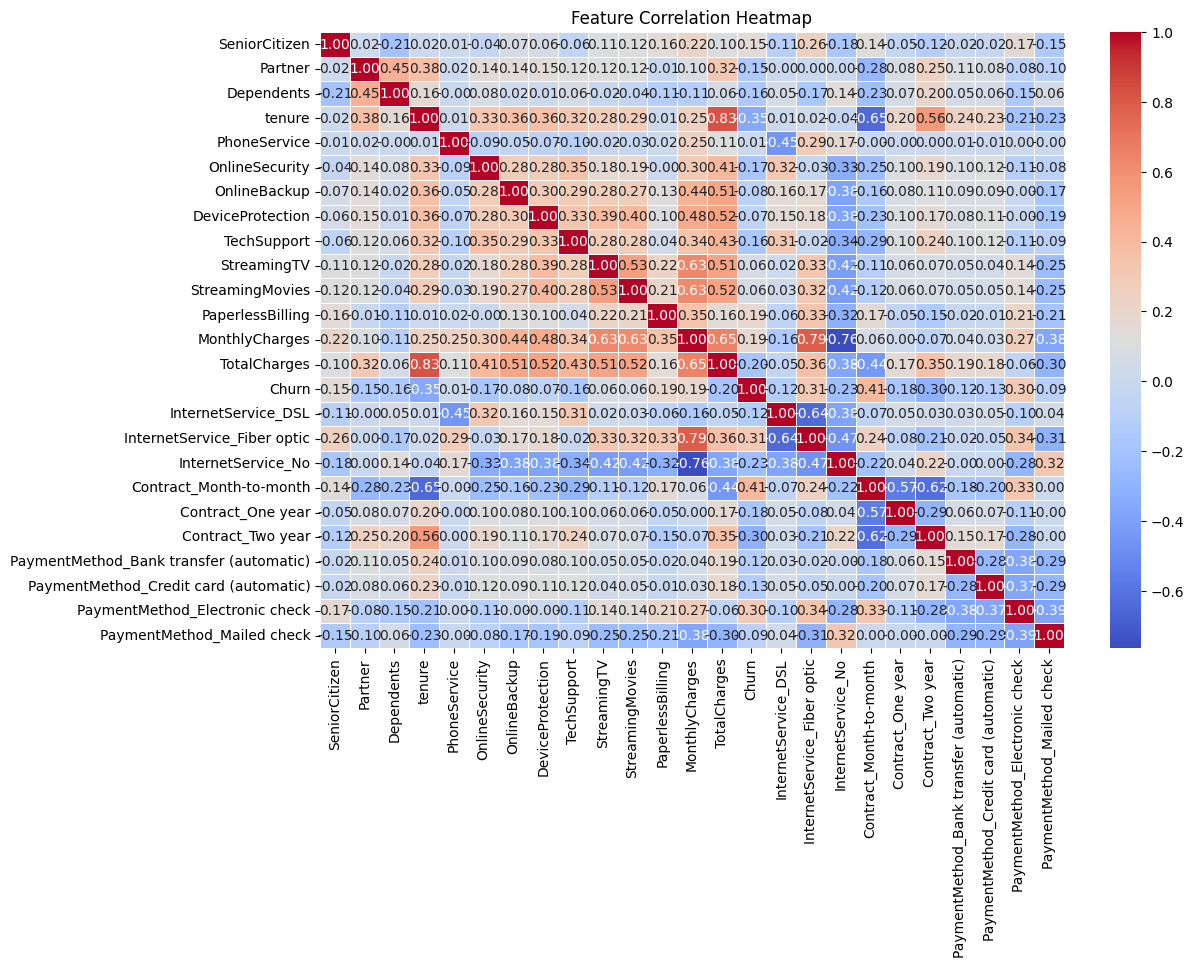

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Splitting Data for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Handling Class Imbalance with SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Selection Using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature selection with RFE
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_resampled, y_resampled)

print("Selected features:", X.columns[rfe.support_])

Selected features: Index(['tenure', 'OnlineSecurity', 'TechSupport', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


Hyperparameter Tuning with GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_selected, y_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.8007387638547409


Model Evaluation with ROC Curve

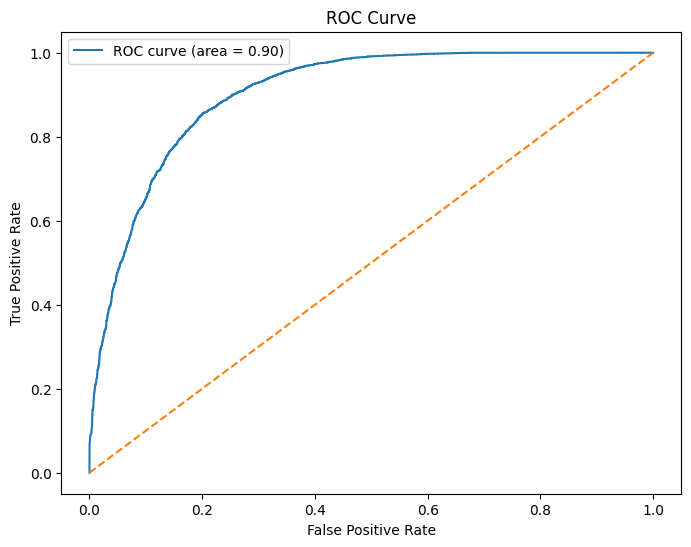

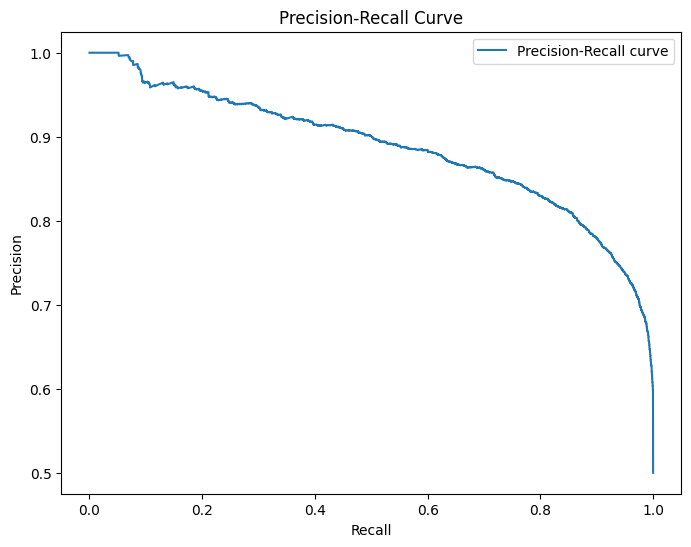

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = grid_search.best_estimator_.predict_proba(X_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_resampled, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_resampled, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Model Evaluation: Logistic Regression

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



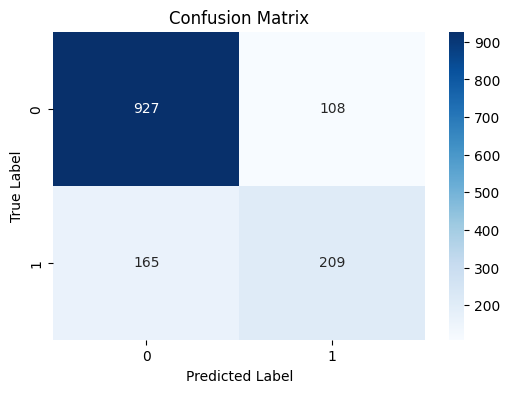

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7899219304471257
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# SVM Classifier

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.7934705464868701
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7977288857345636
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

